In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


# Project: Investigate a Dataset - Income Inequality using Gapminder

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis focuses on income inequailty as measured by the Gini Index* and its association with economic metrics such as GDP per capita, investments as a % of GDP, and tax revenue as a % of GDP. One polical metric, EIU democracy index, is also included.

This investigation can be considered a starting point for complex questions such as:

1. Is a higher tax revenue as a % of GDP associated with less income inequality?
2. Is a higher EIU democracy index associated with less income inequality?
3. Is higher GDP per capita associated with less income inequality?
4. Is higher investments as a % of GDP associated with less income inequality?

This analysis uses the gapminder dataset from the Gapminder Foundation.  The Gapminder Foundation is a non-profit venture registered in Stockholm, Sweden, that promotes sustainable global development and achievement of the United Nations Millennium Development Goals by increased use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels.

*The [Gini Index](https://en.wikipedia.org/wiki/Gini_coefficient) is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents, and is the most commonly used measurement of inequality. It was developed by the Italian statistician and sociologist Corrado Gini and published in his 1912 paper Variability and Mutability. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [7]:
pd.set_option('display.max_rows', 10)
pd.options.display.max_columns = 100
pd.set_option("display.precision", 2)

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data was loaded, checks for cleanliness was done, and findings reported.
### General Properties

The dataset contains data from the following GapMinder datasets:

1. EIU Democracy Index:

"This democracy index is using the data from the Economist Inteligence Unit to express the quality of democracies as a number between 0 and 100. It's based on 60 different aspects of societies that are relevant to democracy universal suffrage for all adults, voter participation, perception of human rights protection and freedom to form organizations and parties.
The democracy index is calculated from the 60 indicators, divided into five ""sub indexes"", which are:

1. Electoral pluralism index;
2. Government index;
3. Political participation indexm;
4. Political culture index;
5. Civil liberty index.

The sub-indexes are based on the sum of scores on roughly 12 indicators per sub-index, converted into a score between 0 and 100.
(The Economist publishes the index with a scale from 0 to 10, but Gapminder has converted it to 0 to 100 to make it easier to communicate as a percentage.)"
https://docs.google.com/spreadsheets/d/1d0noZrwAWxNBTDSfDgG06_aLGWUz4R6fgDhRaUZbDzE/edit#gid=935776888


2. Income: GDP per capita, constant PPP dollars:
GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The unit is in international dollars, fixed 2011 prices. The data is adjusted for inflation and differences in the cost of living between countries, so-called PPP dollars. The end of the time series, between 1990 and 2016, uses the latest GDP per capita data from the World Bank, from their World Development Indicators. To go back in time before the World Bank series starts in 1990, we have used several sources, such as Angus Maddison. 
https://www.gapminder.org/data/documentation/gd001/


3. Investments (% of GDP)
Capital formation is a term used to describe the net capital accumulation during an accounting period for a particular country. The term refers to additions of capital goods, such as equipment, tools, transportation assets, and electricity. Countries need capital goods to replace the older ones that are used to produce goods and services. If a country cannot replace capital goods as they reach the end of their useful lives, production declines. Generally, the higher the capital formation of an economy, the faster an economy can grow its aggregate income.


4. Tax revenue (% of GDP)
refers to compulsory transfers to the central governement for public purposes.  Does not include social security.
https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS


### Initial Analysis of the Datasets


#### Tax Revenue as a Percent of GDP

Below are results of an initial analysis:

The csv files for this analysis were downloaded from the GapMinder website. They can be found here:

https://github.com/psterk1/data_analytics/tree/master/intro/final_project

The first file is 'tax_revenue_percent_of_gdp.csv'

In [8]:
tax = pd.read_csv('../CSV/tax_revenue_percent_of_gdp.csv')

In [9]:
print("number of rows: ", tax.shape[0])
print("number of columns: {}".format(tax.shape[1]))
print("number of duplicates: {}".format(tax.duplicated().sum()))
print("datatypes:\n")
print(tax.dtypes)
print("\nSample:")
tax.head(3)

number of rows:  161
number of columns: 47
number of duplicates: 0
datatypes:

country     object
1972       float64
1973       float64
1974       float64
1975       float64
            ...   
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
Length: 47, dtype: object

Sample:


,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.88,5.23,6.04,8.44,9.12,8.85,7.47,7.08,6.84,7.55,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,8.55,9.48,13.7,NaN,NaN,NaN,16.2,16.8,17.6,NaN,NaN,NaN,NaN,NaN,NaN,18.00,17.50,16.50,18.30,18.50,17.6,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.7,28.6,30.60,31.60,25.0,27.0,36.9,32.0,31.5,27.6,26.8,30.8,40.80,37.40,45.30,35.10,34.40,37.20,NaN,NaN,NaN,NaN,NaN,NaN


An initial analysis revealed that about half the years with > 0.50 missing values. See below:

> Because of the results below, the years with the lowest null value percentage were in the 10 year range from 2006-2016.  As a result, this yearly range was selected for the rest of the datasets.

In [10]:
tax_null = tax.isnull().sum()/tax.shape[0]
tax_null.to_frame().transpose()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,0.76,0.72,0.72,0.71,0.71,0.7,0.7,0.7,0.68,0.68,0.7,0.69,0.69,0.68,0.68,0.7,0.66,0.66,0.52,0.52,0.5,0.49,0.47,0.42,0.42,0.39,0.39,0.37,0.39,0.34,0.3,0.28,0.27,0.24,0.22,0.22,0.17,0.15,0.11,0.11,0.13,0.19,0.2,0.26,0.32,0.96


#### Income Per Person - GDP Per Capita 

Below are results of an initial analysis:

In [11]:
income = pd.read_csv('../CSV/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [12]:
print("number of rows: ", income.shape[0])
print("number of columns: {}".format(income.shape[1]))
print("number of duplicates: {}".format(income.duplicated().sum()))
print("datatypes:\n")
print(income.dtypes)
income.head(3)

number of rows:  193
number of columns: 242
number of duplicates: 0
datatypes:

country    object
1800        int64
1801        int64
1802        int64
1803        int64
            ...  
2036        int64
2037        int64
2038        int64
2039        int64
2040        int64
Length: 242, dtype: object


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,603,604,604,604,604,604,604,604,604,604,604,604,607,609,611,613,615,617,619,621,623,625,627,630,632,634,636,638,640,643,645,647,649,651,654,656,658,660,663,665,...,1650,1520,1010,721,1030,942,865,800,735,687,646,1020,1060,1030,1100,1120,1250,1270,1500,1670,1630,1770,1810,1800,1770,1760,1760,1740,1760,1800,1850,1900,1970,2050,2140,2220,2290,2360,2430,2490,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,668,668,668,668,668,668,669,669,669,669,669,669,671,672,674,675,677,678,680,681,683,684,686,688,689,691,692,694,695,697,699,700,702,703,705,707,708,710,711,713,...,3230,3020,3320,3620,4130,4530,4060,4450,5060,5440,5950,6240,6610,7000,7430,7910,8450,9160,9530,9930,10200,10400,10500,10700,11000,11400,11800,12300,12700,13200,13800,14400,15000,15600,16200,16800,17400,18000,18500,18900,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,743,751,759,767,775,784,792,801,810,819,828,837,846,855,864,874,883,893,903,912,922,932,943,953,963,974,984,995,...,9930,9870,9450,9170,9340,9560,9510,9840,10000,10300,10400,10900,11500,11800,12400,12400,12600,12700,12700,12900,13000,13200,13300,13500,13800,13900,13900,13900,14000,14000,14000,14000,13900,13800,13700,13700,13700,13800,13900,14100,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100


The results below show that there no nulls.

In [13]:
income_null = income.isnull().sum()/income.shape[0]
income_null.to_frame().transpose()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Investment  Percent of GDP

Below are results of an initial analysis:

In [14]:
invest = pd.read_csv('../CSV/investments_percent_of_gdp.csv')

In [15]:
print("number of rows: ", invest.shape[0])
print("number of columns: {}".format(invest.shape[1]))
print("number of duplicates: {}".format(invest.duplicated().sum()))
print("datatypes:\n")
print(invest.dtypes)
print("\nSample:")
invest.head(3)

number of rows:  177
number of columns: 59
number of duplicates: 0
datatypes:

country     object
1960       float64
1961       float64
1962       float64
1963       float64
            ...   
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
Length: 59, dtype: object

Sample:


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,16.1,16.6,19.1,14.2,13.9,11.3,8.41,5.18,6.47,6.47,5.46,5.46,6.55,7.31,8.76,9.77,13.7,12.4,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.3,16.8,18.8,21.6,23.4,19.9,18.9,17.9,17.9,16.6,16.8,17.2,18.1,19.4,17.7,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.5,35.1,37.9,36.1,31.8,32.8,30.9,28.4,28.9,31.7,29.3,7.34,5.2,13.2,17.9,21.0,21.2,20.5,21.0,23.0,31.7,38.4,37.9,40.5,37.2,37.0,39.0,38.7,35.8,34.6,30.3,31.4,28.3,28.4,24.6,24.4,24.8,25.2
2,Algeria,42.2,47.2,35.4,28.9,21.8,22.6,17.30,23.40,27.90,32.40,36.60,35.30,34.30,40.30,40.00,45.40,43.4,46.9,52.2,42.5,39.1,37.0,37.3,37.6,35.2,34.6,33.6,27.6,27.6,30.1,28.6,31.80,30.8,29.1,30.1,30.9,25.7,22.4,27.1,26.2,23.6,26.8,30.7,30.3,33.3,31.7,30.2,34.5,37.3,46.9,41.4,38.1,39.2,43.4,45.6,50.7,50.7,47.8


The results below show that the years with the lowest null value percentage were in the 10 year range from 2006-2016.  As a result, this yearly range was selected for the rest of the datasets.

In [16]:
invest_null = invest.isnull().sum()/invest.shape[0]
invest_null.to_frame().transpose()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,0.63,0.63,0.63,0.63,0.62,0.54,0.53,0.51,0.51,0.51,0.44,0.44,0.44,0.44,0.44,0.42,0.4,0.4,0.4,0.41,0.34,0.32,0.32,0.32,0.32,0.3,0.29,0.27,0.27,0.25,0.18,0.18,0.17,0.16,0.16,0.12,0.11,0.11,0.11,0.11,0.07,0.07,0.06,0.06,0.06,0.07,0.06,0.05,0.05,0.06,0.06,0.05,0.05,0.06,0.06,0.07,0.09,0.25


#### EIU Democracy Index

Below are the results of the initial analysis:

In [17]:
demo = pd.read_csv('../CSV/demox_eiu.csv')

In [18]:
print("number of rows: ", demo.shape[0])
print("number of columns: {}".format(demo.shape[1]))
print("number of duplicates: {}".format(demo.duplicated().sum()))
print("datatypes:\n")
print(demo.dtypes)
print("\nSample:")
demo.head(3)

number of rows:  164
number of columns: 14
number of duplicates: 0
datatypes:

country     object
2006       float64
2007       float64
2008       float64
2009       float64
            ...   
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
Length: 14, dtype: object

Sample:


,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,30.6,30.4,30.2,27.5,24.8,24.8,24.8,24.8,27.7,27.7,25.5,25.5,29.7
1,Albania,59.1,59.1,59.1,58.9,58.6,58.1,56.7,56.7,56.7,59.1,59.1,59.8,59.8
2,Algeria,31.7,32.5,33.2,33.8,34.4,34.4,38.3,38.3,38.3,39.5,35.6,35.6,35.0


The results below show that there were no nulls in the dataset.

In [19]:
demo_null = demo.isnull().sum()/demo.shape[0]
demo_null.to_frame().transpose()

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Gini Dataset

Below are results of the initial analysis:

In [20]:
gini = pd.read_csv('../CSV/gini.csv')

In [21]:
print("number of rows: ", gini.shape[0])
print("number of columns: {}".format(gini.shape[1]))
print("number of duplicates: {}".format(gini.duplicated().sum()))
print("datatypes:\n")
print(gini.dtypes)
print("\nSample:")
gini.head(3)

number of rows:  195
number of columns: 242
number of duplicates: 0
datatypes:

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2036       float64
2037       float64
2038       float64
2039       float64
2040       float64
Length: 242, dtype: object

Sample:


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.6,30.7,30.9,31.2,31.5,...,36.7,36.7,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,27.0,27.0,27.0,27.0,27.2,27.5,28.0,28.6,29.4,30.2,30.7,31.0,31.1,31.0,30.7,30.4,30.2,30.0,29.7,29.5,29.3,29.1,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.3,56.4,56.5,56.6,56.7,56.8,56.9,57.0,57.2,57.4,57.5,57.7,57.9,58.1,58.2,58.4,58.6,58.8,58.9,59.1,59.3,59.5,59.6,59.8,60.0,60.2,60.3,60.4,60.5,60.4,60.3,...,38.1,37.4,36.7,36.1,35.5,34.9,34.4,34.0,33.5,33.1,32.6,32.2,31.7,31.2,30.8,30.3,29.9,29.4,29.0,28.5,28.2,27.9,27.7,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6


The results below show that there were no nulls in the dataset.

In [22]:
gini_null = gini.isnull().sum()/gini.shape[0]
gini_null.to_frame().transpose()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Conclusions and Next Steps

Below are the conclusions of the inital analysis:
    
1. Since the EIU Democracy Index only has data for years 2006 - 2018, a similar range of years will be selected for the other datasets.
2. The percentage of nulls in the Tax Revenue as a Percent of GDP was least from the years 2006 - 2016. Most values were missing for 2017. As a result of this, plus the result in 1. above, the the year period 2006 - 2016 will be selected for this dataset.

#### Next Steps

1. The above datasets will have the country column plus the years 2006 - 2016.
2. The datasets will be pivoted to have continent, country, year and the above datasets.  Below is an example of what the final combined dataset will look like:

|continent|country|year|demox_eiu|income_per_person|invest_%_gdp|tax_%_gdp|gini_index|
|---------|-------|----|---------|-----------------|------------|---------|----------|
|Asia|	Afghanistan|	2006|	30.6|	1120|	23.40|	6.88|	36.8|
|Asia|	Afghanistan|	2007|	30.4|	1250|	19.90|	5.23|	36.8|
|Asia|	Afghanistan|	2008|	30.2|	1270|	18.90|	6.04|	36.8|

### Slicing and Reorganizing the Datasets

#### EIU Democracy Index

In [23]:
demo_last_10 = demo.iloc[:, :-2]
demo_last_10.head(3)

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,30.6,30.4,30.2,27.5,24.8,24.8,24.8,24.8,27.7,27.7,25.5
1,Albania,59.1,59.1,59.1,58.9,58.6,58.1,56.7,56.7,56.7,59.1,59.1
2,Algeria,31.7,32.5,33.2,33.8,34.4,34.4,38.3,38.3,38.3,39.5,35.6


In [24]:
demo_last_10 = demo_last_10.melt(id_vars=['country'], var_name='year', value_name='demox_eiu')
demo_last_10.sort_values(['country','year'], inplace=True)
demo_last_10.head(3)

,country,year,demox_eiu
0,Afghanistan,2006,30.6
164,Afghanistan,2007,30.4
328,Afghanistan,2008,30.2


#### Income Per Person (GDP per Capita)

In [25]:
income_last_10 = income.iloc[:, np.r_[:1, 207:218]]
income_last_10

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,1120,1250,1270,1500,1670,1630,1770,1810,1800,1770,1760
1,Albania,7910,8450,9160,9530,9930,10200,10400,10500,10700,11000,11400
2,Algeria,12400,12600,12700,12700,12900,13000,13200,13300,13500,13800,13900
3,Andorra,42700,43400,41400,41700,39000,42000,41900,43700,44900,46600,48200
4,Angola,5500,6040,6470,6290,6360,6350,6650,6730,6810,6650,6260
...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,16400,17600,18200,17400,16900,17300,18000,18000,17100,15600,15200
189,Vietnam,3630,3850,4030,4210,4430,4660,4860,5070,5310,5610,5900
190,Yemen,4270,4290,4320,4360,4570,3880,3860,3940,3830,3110,2620
191,Zambia,2650,2800,2930,3120,3340,3420,3570,3630,3690,3680,3700


In [26]:
income_last_10 = income_last_10.melt(id_vars=['country'], var_name='year', value_name='income_per_person')
income_last_10.sort_values(['country', 'year'], inplace=True)

In [27]:
income_last_10.head(3)

,country,year,income_per_person
0,Afghanistan,2006,1120
193,Afghanistan,2007,1250
386,Afghanistan,2008,1270


#### Investment Percent of GDP

In [28]:
invest_last_10 = invest.iloc[:, np.r_[:1, 47:58]]
invest_last_10 = invest_last_10.melt(id_vars=['country'], var_name='year', value_name='invest_%_gdp')
invest_last_10.sort_values(['country', 'year'], inplace=True)
invest_last_10.head(3)

,country,year,invest_%_gdp
0,Afghanistan,2006,23.4
177,Afghanistan,2007,19.9
354,Afghanistan,2008,18.9


#### Tax Revenue Percent of GDP

In [29]:
tax_last_10 = tax.iloc[:, np.r_[:1, 35:46]]
tax_last_10 = tax_last_10.melt(id_vars=['country'], var_name='year', value_name='tax_%_gdp')
tax_last_10.sort_values(['country', 'year'], inplace=True)
tax_last_10.head(3)

,country,year,tax_%_gdp
0,Afghanistan,2006,6.88
161,Afghanistan,2007,5.23
322,Afghanistan,2008,6.04


#### Gini Index

In [30]:
gini_last_10 = gini.iloc[:, np.r_[:1, 207:218]]
gini_last_10 = gini_last_10.melt(id_vars=['country'], var_name='year', value_name='gini_index')
gini_last_10.sort_values(by=['country', 'year'], inplace=True)
gini_last_10.head(3)

,country,year,gini_index
0,Afghanistan,2006,36.8
195,Afghanistan,2007,36.8
390,Afghanistan,2008,36.8


### Merging the Datasets

In [31]:
combined = demo_last_10.merge(income_last_10, left_on=['country', 'year'], right_on=['country', 'year'])
combined = combined.merge(invest_last_10, left_on=['country', 'year'], right_on=['country', 'year'])
combined = combined.merge(tax_last_10, left_on=['country', 'year'], right_on=['country', 'year'])
combined = combined.merge(gini_last_10, left_on=['country', 'year'], right_on=['country', 'year'])
combined

,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
0,Afghanistan,2006,30.6,1120,23.4,6.88,36.8
1,Afghanistan,2007,30.4,1250,19.9,5.23,36.8
2,Afghanistan,2008,30.2,1270,18.9,6.04,36.8
3,Afghanistan,2009,27.5,1500,17.9,8.44,36.8
4,Afghanistan,2010,24.8,1670,17.9,9.12,36.8
...,...,...,...,...,...,...,...
1524,Zimbabwe,2012,26.7,2490,11.8,21.40,43.2
1525,Zimbabwe,2013,26.7,2490,11.4,NaN,43.2
1526,Zimbabwe,2014,27.8,2510,11.8,NaN,43.2
1527,Zimbabwe,2015,30.5,2510,12.3,NaN,43.2


In [32]:
cont = pd.read_csv('../CSV/continent_country.csv')
cont

,continent,country
0,Africa,"Congo, Dem. Rep."
1,Africa,"Congo, Rep."
2,Africa,Algeria
3,Africa,Angola
4,Africa,Benin
...,...,...
165,Europe,Ukraine
166,Europe,United Kingdom
167,Oceania,Australia
168,Oceania,New Zealand


#### Matching Country with Continent

In this step, we match each country with its continent.  This will enable analysis at the continent level for broader trend detection.

In [33]:
combined_final = cont.merge(combined, left_on=['country'], right_on=['country'])
combined_final

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
0,Africa,"Congo, Dem. Rep.",2006,27.6,605,14.6,6.83,42.2
1,Africa,"Congo, Dem. Rep.",2007,25.2,623,13.7,6.99,42.1
2,Africa,"Congo, Dem. Rep.",2008,22.8,640,10.9,8.97,42.1
3,Africa,"Congo, Dem. Rep.",2009,22.1,637,14.6,7.89,42.1
4,Africa,"Congo, Dem. Rep.",2010,21.5,660,28.8,8.35,42.1
...,...,...,...,...,...,...,...,...
1524,Oceania,New Zealand,2012,92.6,33300,20.9,26.80,33.5
1525,Oceania,New Zealand,2013,92.6,33900,22.0,26.60,34.0
1526,Oceania,New Zealand,2014,92.6,34600,22.9,26.80,34.0
1527,Oceania,New Zealand,2015,92.6,35200,23.4,27.40,34.5


### Data Cleaning

Below are the steps taken to ensure quality of the dataset:

#### Missing Values

Below are is a summary of missing values (nulls) in the dataset:

In [34]:
combined_final.isna().sum()

continent              0
country                0
year                   0
demox_eiu              0
income_per_person      0
invest_%_gdp          31
tax_%_gdp            285
gini_index             0
dtype: int64

One option for handling the missing 'tax_%_gdp' values would be to replace them with the country's mean.  However, some of the countries have all nulls and some have mostly nulls for this column.  

A second option is to drop the rows with nulls. In the interest of simplicity, we will use this option. 

In [35]:
combined_final.dropna(inplace=True)
combined_final.isna().sum()

continent            0
country              0
year                 0
demox_eiu            0
income_per_person    0
invest_%_gdp         0
tax_%_gdp            0
gini_index           0
dtype: int64

#### Duplicates

There are no duplicates in the dataset:

In [36]:
combined_final.duplicated().sum()

0

#### Descriptive Statistics

Below are descriptive statistics of the dataset.  A review of the values indicates that the min, max and mean values appear to be reasonable.  

In [37]:
combined_final.describe()

,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
count,1234.00,1234.00,1234.00,1234.00,1234.00
mean,62.08,20520.39,24.39,16.77,38.04
std,20.57,19421.17,7.96,7.63,8.39
min,16.60,605.00,0.00,0.04,24.40
25%,46.25,5935.00,19.50,12.33,32.10
50%,64.90,13700.00,23.20,15.90,36.00
75%,78.80,31175.00,27.70,21.30,42.58
max,99.30,120000.00,67.90,62.90,63.90


### Summary
Since there are The results of the initial analysis indicate that the dataset is clean, no further cleaning steps were needed.

In [38]:
print("number of rows: ", combined_final.shape[0])
print("number of columns: {}".format(combined_final.shape[1]))
print("datatypes:\n")
print(combined_final.dtypes)

number of rows:  1234
number of columns: 8
datatypes:

continent             object
country               object
year                  object
demox_eiu            float64
income_per_person      int64
invest_%_gdp         float64
tax_%_gdp            float64
gini_index           float64
dtype: object


In [39]:
# These the continents included in the dataset. All values look reasonable.
combined_final.continent.unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [40]:
combined_final.country.unique()

array(['Congo, Dem. Rep.', 'Congo, Rep.', 'Algeria', 'Angola', 'Benin',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde',
       'Central African Republic', "Cote d'Ivoire", 'Egypt',
       'Equatorial Guinea', 'Ethiopia', 'Gambia', 'Ghana', 'Kenya',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Argentina', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay', 'Peru', 'Suriname',
       'United States', 'Uruguay', 'Afghanistan', 'Armenia', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Bhutan', 'Cambodia', 'China', 'Fiji',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kuwait', 'Ka

#### Save the Cleaned Dataset


In [41]:
combined_final.to_csv('combined_final_last_10_years.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Is Income Inequality Getting Worse or Better in the Last 10 Years?

Better means the Gini Index is going down.

#### Global Gini Mean By Year

In [42]:
columns = ['year', 'gini_index']
gini = combined_final[columns]
gini

,year,gini_index
0,2006,42.2
1,2007,42.1
2,2008,42.1
3,2009,42.1
4,2010,42.1
...,...,...
1524,2012,33.5
1525,2013,34.0
1526,2014,34.0
1527,2015,34.5


In [43]:
gini_annual_average = gini.groupby('year')['gini_index'].mean()
gini_annual_average

year
2006    38.67
2007    38.65
2008    38.53
2009    38.51
2010    38.29
        ...  
2012    38.05
2013    37.48
2014    37.32
2015    37.43
2016    37.32
Name: gini_index, Length: 11, dtype: float64

As the plot below shows, the mean global gini index has been going down over the last 10 years, meaning global income inequality is improving.

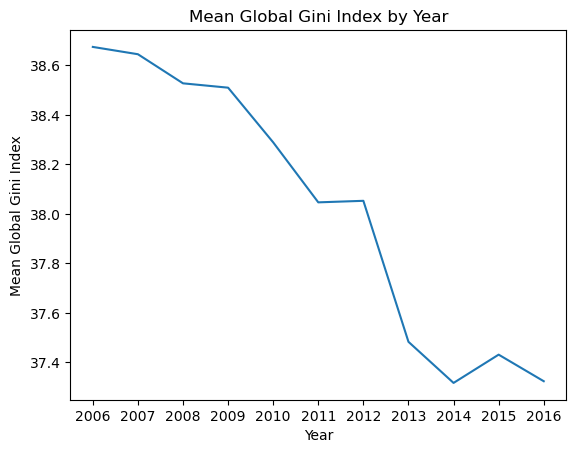

In [44]:
plt.plot(gini_annual_average.index, gini_annual_average)
plt.title('Mean Global Gini Index by Year')
plt.xlabel('Year')
plt.ylabel('Mean Global Gini Index');

Mean Global Gini Index by Continent:

In [45]:
columns = ['year', 'continent', 'gini_index']
gini = combined_final[columns]
gini

,year,continent,gini_index
0,2006,Africa,42.2
1,2007,Africa,42.1
2,2008,Africa,42.1
3,2009,Africa,42.1
4,2010,Africa,42.1
...,...,...,...
1524,2012,Oceania,33.5
1525,2013,Oceania,34.0
1526,2014,Oceania,34.0
1527,2015,Oceania,34.5


In [46]:
gini_cont_average = gini.groupby(['year', 'continent'])['gini_index'].mean()
gini_cont_average

year  continent
2006  Africa       43.01
      Americas     49.15
      Asia         38.13
      Europe       31.73
      Oceania      33.75
                   ...  
2016  Africa       46.67
      Americas     44.81
      Asia         35.25
      Europe       31.50
      Oceania      33.55
Name: gini_index, Length: 55, dtype: float64

The chart below reveals that, on a continent basis, all were either declining or mostly flat, except for Africa.

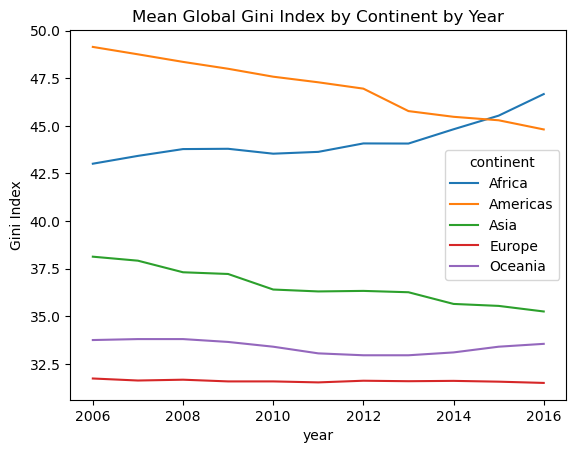

In [47]:
gini_cont_average.unstack(level=1).plot(kind='line', subplots=False, \
                                        title='Mean Global Gini Index by Continent by Year').\
                                        set_ylabel("Gini Index");

In [48]:
columns = ['year', 'continent', 'country', 'gini_index']
gini = combined_final[columns]
gini

,year,continent,country,gini_index
0,2006,Africa,"Congo, Dem. Rep.",42.2
1,2007,Africa,"Congo, Dem. Rep.",42.1
2,2008,Africa,"Congo, Dem. Rep.",42.1
3,2009,Africa,"Congo, Dem. Rep.",42.1
4,2010,Africa,"Congo, Dem. Rep.",42.1
...,...,...,...,...
1524,2012,Oceania,New Zealand,33.5
1525,2013,Oceania,New Zealand,34.0
1526,2014,Oceania,New Zealand,34.0
1527,2015,Oceania,New Zealand,34.5


### Research Question 2 - What Top 10 Countries Have the Lowest and Highest Income Inequality?

#### Lowest

Overall, most of the countries with the lowest income inequality are in Europe.

In [49]:
gini.groupby(['country', 'continent'])['gini_index'].mean().to_frame().sort_values(by=['gini_index']).head(10)

,,gini_index
country,continent,
Slovenia,Europe,25.06
Ukraine,Europe,25.64
Czech Republic,Europe,26.25
Norway,Europe,26.75
Slovak Republic,Europe,26.79
Denmark,Europe,27.16
Kazakhstan,Asia,27.44
Finland,Europe,27.45
Belarus,Europe,27.49


#### Highest

Overall, most of the countries with the lowest income inequality are in Africa and in Americas.

In [50]:
gini.groupby(['country', 'continent'])['gini_index'].mean().to_frame().sort_values(by=['gini_index'], ascending=False).head(10)

,,gini_index
country,continent,
South Africa,Africa,63.35
Botswana,Africa,61.09
Namibia,Africa,60.75
Suriname,Americas,60.51
Zambia,Africa,56.44
Central African Republic,Africa,55.70
Bolivia,Americas,54.55
Honduras,Americas,53.94
Lesotho,Africa,53.93


### Research Question 3 - Is a higher tax revenue as a % of GDP associated with less income inequality?

The hypothesis is that countries with higher tax revenue as % of GDP are associated with lower income inequality.  The assumption for this is that higher tax revenues are distributed back to lower economic strata in the form of social benefits. Let's see what the data shows.

In [51]:
columns = ['continent', 'country', 'year', 'tax_%_gdp', 'gini_index']
tax = combined_final[columns]
tax

,continent,country,year,tax_%_gdp,gini_index
0,Africa,"Congo, Dem. Rep.",2006,6.83,42.2
1,Africa,"Congo, Dem. Rep.",2007,6.99,42.1
2,Africa,"Congo, Dem. Rep.",2008,8.97,42.1
3,Africa,"Congo, Dem. Rep.",2009,7.89,42.1
4,Africa,"Congo, Dem. Rep.",2010,8.35,42.1
...,...,...,...,...,...
1524,Oceania,New Zealand,2012,26.80,33.5
1525,Oceania,New Zealand,2013,26.60,34.0
1526,Oceania,New Zealand,2014,26.80,34.0
1527,Oceania,New Zealand,2015,27.40,34.5


It is difficult to see a trend in the scatter plot below:

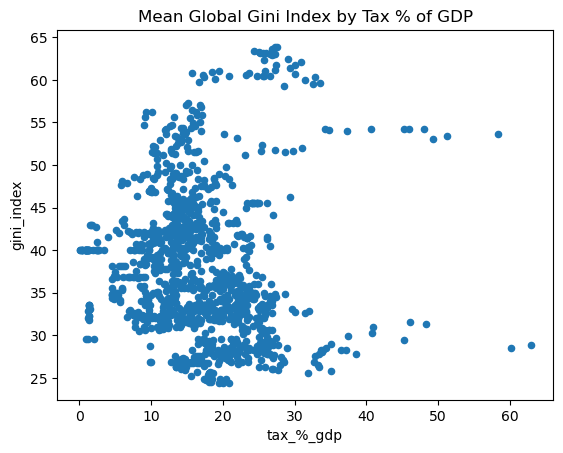

In [52]:
tax.plot(x='tax_%_gdp', y='gini_index', kind='scatter', title='Mean Global Gini Index by Tax % of GDP');

Looking at the log of both values reveals that the correlation between the two variables is essentially flat - there is no compelling evidence that higher tax percent of GDP leads to less income inequality.

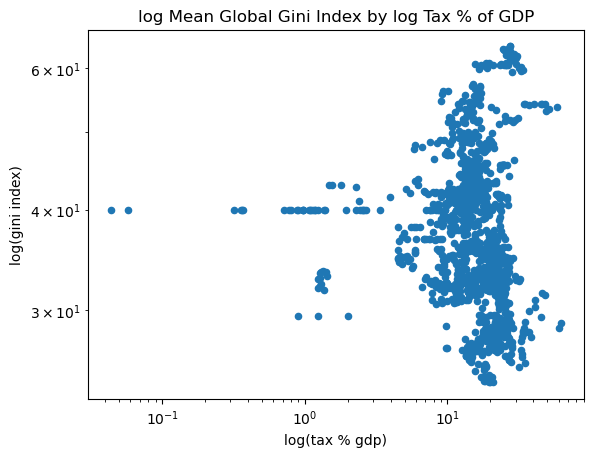

In [53]:
tax_plot = tax.plot(x='tax_%_gdp', y='gini_index', kind='scatter', loglog=True, \
                    title='log Mean Global Gini Index by log Tax % of GDP')
tax_plot.set_xlabel('log(tax % gdp)')
tax_plot.set_ylabel('log(gini index)');

The Pearson correlation is slightly negative at -0.08:

In [54]:
tax_log = np.log(tax['tax_%_gdp']).to_frame()
tax_log['log_gini_index'] = np.log(tax['gini_index'])
tax_log.corr()

,tax_%_gdp,log_gini_index
tax_%_gdp,1.00,-0.08
log_gini_index,-0.08,1.00


### Research Question 4 - Is Higher Income Per Person - GDP Per Capita associated with less income inequality?

The hypothesis is that a higher income per person indicates that more of the country's GDP is being distributed equality among its population.

In [55]:
columns = ['continent', 'country', 'year', 'income_per_person', 'gini_index']
income = combined_final[columns]
income

,continent,country,year,income_per_person,gini_index
0,Africa,"Congo, Dem. Rep.",2006,605,42.2
1,Africa,"Congo, Dem. Rep.",2007,623,42.1
2,Africa,"Congo, Dem. Rep.",2008,640,42.1
3,Africa,"Congo, Dem. Rep.",2009,637,42.1
4,Africa,"Congo, Dem. Rep.",2010,660,42.1
...,...,...,...,...,...
1524,Oceania,New Zealand,2012,33300,33.5
1525,Oceania,New Zealand,2013,33900,34.0
1526,Oceania,New Zealand,2014,34600,34.0
1527,Oceania,New Zealand,2015,35200,34.5


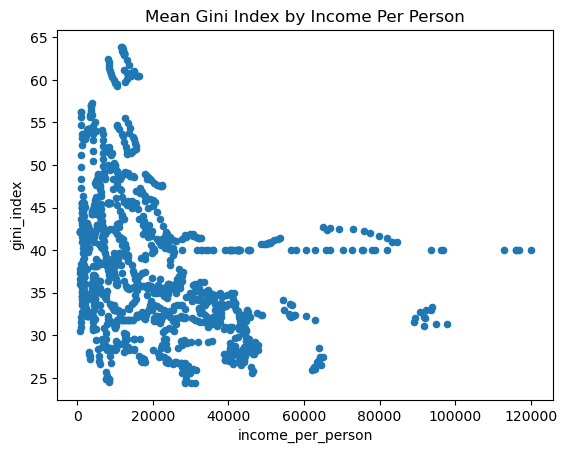

In [56]:
income.plot(x='income_per_person', y='gini_index', kind='scatter', title='Mean Gini Index by Income Per Person');

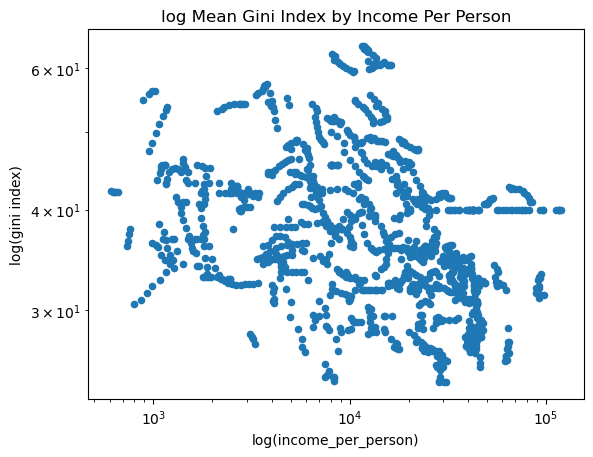

In [57]:
income_plot = income.plot(x='income_per_person', y='gini_index', kind='scatter', loglog=True, \
                    title='log Mean Gini Index by Income Per Person')
income_plot.set_xlabel('log(income_per_person)')
income_plot.set_ylabel('log(gini index)');

In this case, the Person correlation coefficient is -0.34 indicating that there is weak correlation between  log(income_per_person) and the log(gini_index):

In [58]:
income_log = np.log(income['income_per_person']).to_frame()
income_log['log_gini_index'] = np.log(tax['gini_index'])
income_log.corr()

,income_per_person,log_gini_index
income_per_person,1.00,-0.34
log_gini_index,-0.34,1.00


### Research Question 5 - Is Higher Investment as % GDP associated with less income inequality?

The hypothesis is that a higher investment as a percent of GDP indicates that more of the country's GDP is being invested in capital improvements which distributes income benefits across a wide segment of the populcation leading to more equality among its population.

In [59]:
columns = ['continent', 'country', 'year', 'invest_%_gdp', 'gini_index']
invest = combined_final[columns]
invest

,continent,country,year,invest_%_gdp,gini_index
0,Africa,"Congo, Dem. Rep.",2006,14.6,42.2
1,Africa,"Congo, Dem. Rep.",2007,13.7,42.1
2,Africa,"Congo, Dem. Rep.",2008,10.9,42.1
3,Africa,"Congo, Dem. Rep.",2009,14.6,42.1
4,Africa,"Congo, Dem. Rep.",2010,28.8,42.1
...,...,...,...,...,...
1524,Oceania,New Zealand,2012,20.9,33.5
1525,Oceania,New Zealand,2013,22.0,34.0
1526,Oceania,New Zealand,2014,22.9,34.0
1527,Oceania,New Zealand,2015,23.4,34.5


In [60]:
invest = invest[invest['invest_%_gdp'] > 0]

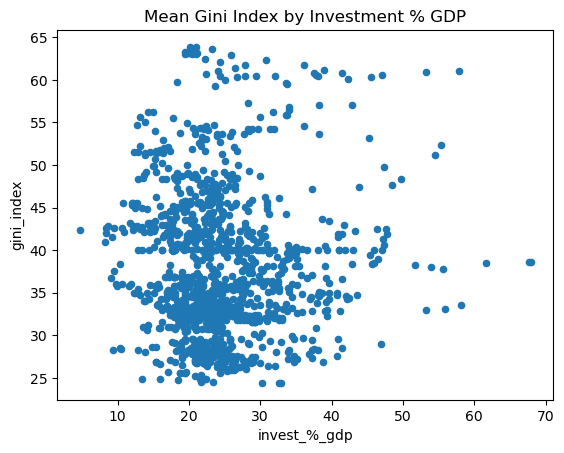

In [61]:
invest.plot(x='invest_%_gdp', y='gini_index', kind='scatter', title='Mean Gini Index by Investment % GDP');

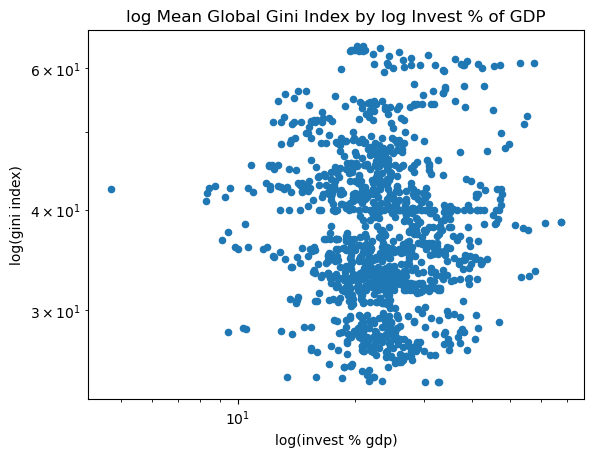

In [62]:
invest_plot = invest.plot(x='invest_%_gdp', y='gini_index', kind='scatter', loglog=True, \
                    title='log Mean Global Gini Index by log Invest % of GDP')
invest_plot.set_xlabel('log(invest % gdp)')
invest_plot.set_ylabel('log(gini index)');

The Pearson corr coefficient of -0.03 indicates no correlation between these two variables.

In [63]:
invest_log = np.log(invest['invest_%_gdp']).to_frame()
invest_log['log_gini_index'] = np.log(tax['gini_index'])
invest_log.corr()

,invest_%_gdp,log_gini_index
invest_%_gdp,1.00,-0.03
log_gini_index,-0.03,1.00


### Research Question 6 - Is Higher EIU Democracy Index associated with less income inequality?

The hypothesis is that countries with higher EIU Democracy Index address the needs of a broader segment of the popluation leading to less income inequality.

In [64]:
columns = ['continent', 'country', 'year', 'demox_eiu', 'gini_index']
demo = combined_final[columns]
demo

,continent,country,year,demox_eiu,gini_index
0,Africa,"Congo, Dem. Rep.",2006,27.6,42.2
1,Africa,"Congo, Dem. Rep.",2007,25.2,42.1
2,Africa,"Congo, Dem. Rep.",2008,22.8,42.1
3,Africa,"Congo, Dem. Rep.",2009,22.1,42.1
4,Africa,"Congo, Dem. Rep.",2010,21.5,42.1
...,...,...,...,...,...
1524,Oceania,New Zealand,2012,92.6,33.5
1525,Oceania,New Zealand,2013,92.6,34.0
1526,Oceania,New Zealand,2014,92.6,34.0
1527,Oceania,New Zealand,2015,92.6,34.5


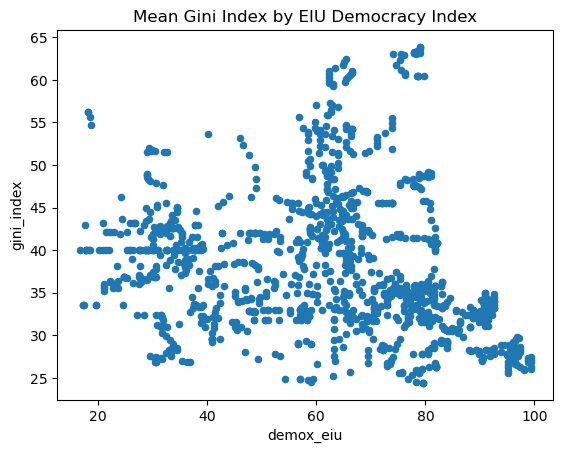

In [65]:
demo.plot(x='demox_eiu', y='gini_index', kind='scatter', title='Mean Gini Index by EIU Democracy Index');

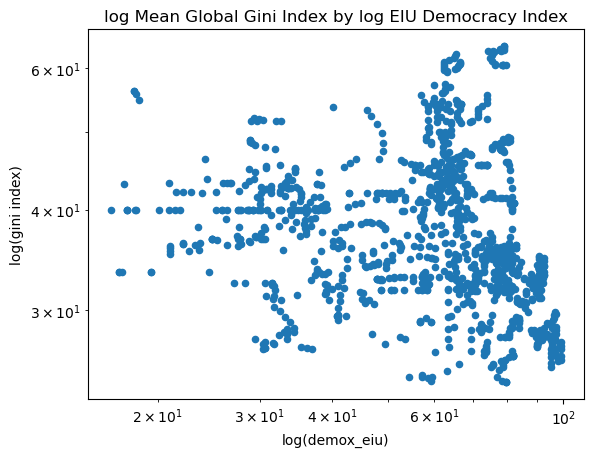

In [66]:
demo_plot = demo.plot(x='demox_eiu', y='gini_index', kind='scatter', loglog=True, \
                    title='log Mean Global Gini Index by log EIU Democracy Index')
demo_plot.set_xlabel('log(demox_eiu)')
demo_plot.set_ylabel('log(gini index)');

In this case, the Person correlation coefficient is -0.2 indicating that there is weak correlation between  log(demox_eiu) and the log(gini_index):

In [67]:
demo_log = np.log(demo['demox_eiu']).to_frame()
demo_log['log_gini_index'] = np.log(tax['gini_index'])
demo_log.corr()

,demox_eiu,log_gini_index
demox_eiu,1.0,-0.2
log_gini_index,-0.2,1.0


<a id='conclusions'></a>
## Conclusions

The following are the conclusions from this analysis:

***Research Question 1 - Is Income Inequality Getting Worse or Better in the Last 10 Years?***
 
Answer: 

Yes, it is getting better, improving from 38.7 to 37.3

On a continent basis, all were either declining or mostly flat, except for Africa.
   
***Research Question 2 - What Top 10 Countries Have the Lowest and Highest Income Inequality?***
  
Answer: 
  
Lowest: Slovenia, Ukraine, Czech Republic, Norway, Slovak Republic, Denmark, Kazakhstan, Finland,      Belarus,Kyrgyz Republic

Highest: Colombia, Lesotho, Honduras, Bolivia, Central African Republic, Zambia, Suriname, Namibia,                 Botswana, South Africa


***Research Question 3 Is a higher tax revenue as a % of GDP associated with less income inequality?***

Answer: No


***Research Question 4 - Is Higher Income Per Person - GDP Per Capita associated with less income inequality?***

Answer: No, but weak negative correlation.


***Research Question 5 - Is Higher Investment as % GDP associated with less income inequality?***

Answer: No

***Research Question 6 - Is Higher EIU Democracy Index associated with less income inequality?***

Answer: No, but weak negative correlation.


The above results suggest that there are other drivers for the overall reduction in income inequality.  Futher analysis of additional factors should be undertaken.
